<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 03
## Clase 02: Visualización Imperativa

## Objetivos

* Comprender el estilo de visualización imperativa.
* Aplicar gráficos adecuados dependiendo de los datos.

## Contenidos
* [Visualización Imperativa](#imperative)
* [Matplotlib](#matplotlib)
* [Gráfico a Gráfico](#plot-plot)
    - [Gráfico de Barras](#barplot)
    - [Gráfico de Líneas](#lineplot)
    - [Scatter Plot](#scatter-plot)
    - [Gráfico de Barras de Error](#error-bar-plot)
    - [Countour Plot](#countour-plot)
    - [Campo de Vectores](#vector-field)

## Visualización Imperativa
<a id='imperative'></a>

Este paradigma se focaliza en las instrucciones recibidas, ya que no abstrae las operaciones o codificaciones visuales. Algunas de sus características son:

* Se especifica _Cómo_ se debe hacer algo.
* Se deben especificar manualmente los pasos del trazado.
* Especificación y ejecución entrelazadas.

Coloquialmente se puede entender como que se debe decidir pixel a pixel lo que se desea mostrar.

## Matplotlib
<a id='matplotlib'></a>

Lo mejor para entender una librería es la explicación que entrega la misma comunidad, a continuación un extracto de la [página web](https://matplotlib.org) de matplotlib:

_Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits._

_Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code. For examples, see the sample plots and thumbnail gallery._

_For simple plotting the pyplot module provides a MATLAB-like interface, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an object oriented interface or via a set of functions familiar to MATLAB users._

### Conceptos Generales

El trazado requiere acción en un rango de niveles, desde el más general (por ejemplo, 'contornear este arreglo 2D') hasta el más específico (por ejemplo, 'colorear un píxel de color rojo'). El propósito de esta librería es generar gráficos de manera rápida lo más fácil posible (con código de alto nivel), pero con la capacidad de usar código de bajo nivel cuando sea necesario.

Por lo tanto, todo en matplotlib está organizado en una jerarquía. En la parte superior se encuentra el módulo `matplotlib.pyplot`. En este nivel, se utilizan funciones simples para agregar elementos de trazado (líneas, imágenes, texto, etc.) a los ejes actuales en la figura actual. El siguiente nivel en la jerarquía es el primer nivel de la interfaz orientada a objetos, en la que pyplot se usa solo para algunas funciones, como la creación de figuras, y el usuario crea y realiza un seguimiento explícito de los objetos de figuras y ejes. En este nivel, el usuario usa pyplot para crear figuras, y a través de esas figuras, se pueden crear uno o más objetos de ejes. Estos objetos de ejes se utilizan para la mayoría de las acciones de trazado.

![mpl_anatomy](images/matplotlib_anatomy.webp)

### Figure

Es la visualización completa. _Figure_ realiza un seguimiento de todos los _Axes_ hijos y el _Canvas_. Una figura puede tener cualquier número de _Axes_, pero para ser útil debe tener al menos uno.

La forma más fácil de crear una nueva _Figure_ es con pyplot:

```python
fig = plt.figure()  # an empty figure with no axes

fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
```

### Axes

Esto es lo que se puede pensar como 'un gráfico', es la región de la imagen con el espacio de datos. Un _Figure_ dada puede contener muchos _Axes_, pero un objeto _Axe_ dado solo puede estar en un _Figure_. _Axes_ contiene dos (o tres en el caso de 3D) objetos _Axis_ que se ocupan de los límites de datos. Cada _Axe_ tiene un título, una etiqueta para el eje horizonal y una etiqueta para el eje vertical.

La clase _Axes_ y sus funciones son el punto de entrada principal para trabajar con la interfaz orientada a objetos.

### Axis

Corresponden a los ejes, algo así como líneas rectas. Se encargan de establecer los límites del gráfico y generar los ticks (las marcas en el eje) y los ticklabels (_strings_ que etiquetan los ticks).

## Gráfico a Gráfico
<a id='plot-plot'></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.stats import multivariate_normal

%matplotlib inline

### Gráfico de Barras
<a id='barplot'></a>

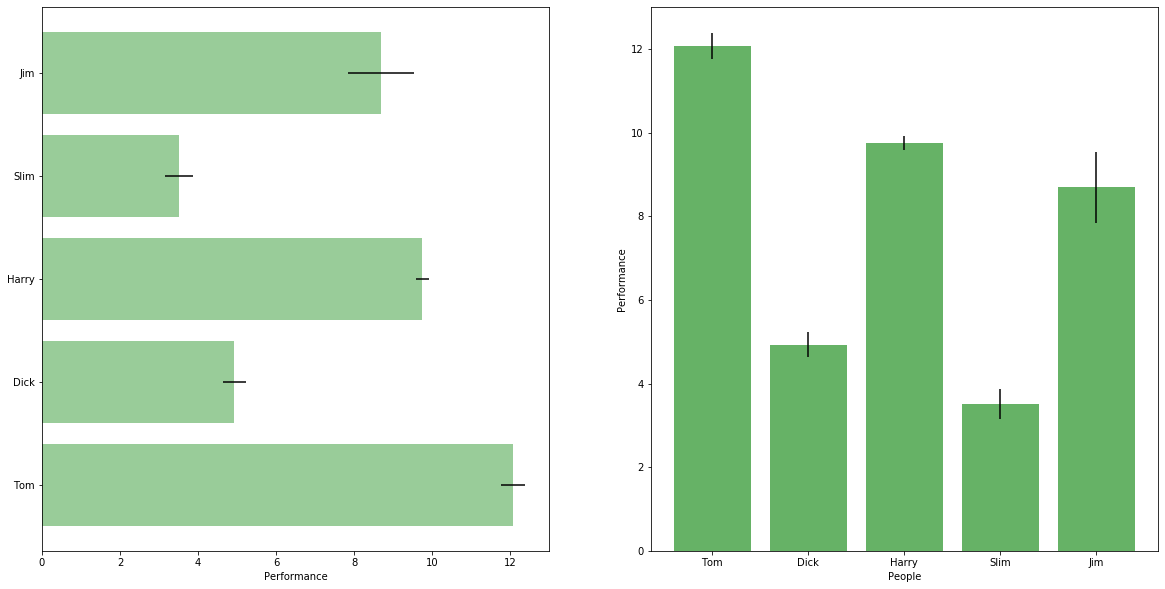

In [2]:
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

# Another way without axes
fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.barh(y_pos, performance, xerr=error, align='center', color="g", alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('Performance')

plt.subplot(1, 2, 2)
plt.bar(y_pos, performance, yerr=error, align='center', color="g", alpha=0.6)
plt.xticks(y_pos, people)
plt.xlabel('People')
plt.ylabel('Performance')

plt.show()

### ¿Cuándo utilizar gráfico de barras?
* x: Debe ser datos del tipo nominal o ordinal.
* y: Debe ser datos de tipo ordinal, posicional o cuantitativo.

Evitar: gráfico de nominal vs nominal.

### Gráfico de Líneas
<a id='lineplot'></a>

C:\Users\Public\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


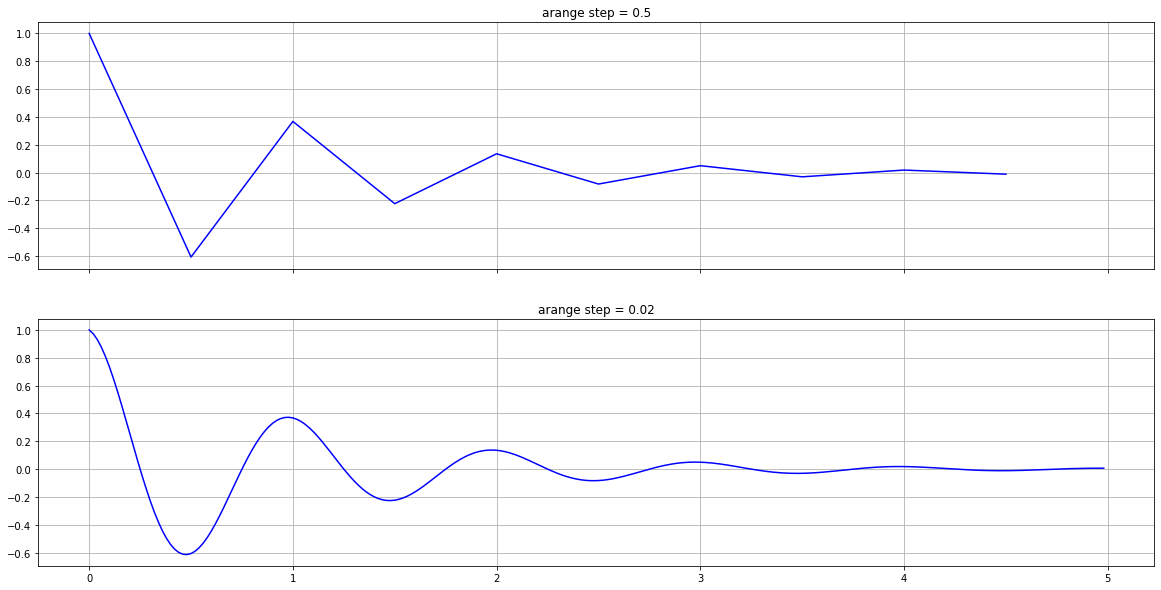

In [3]:
def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)

t1 = np.arange(0.0, 5.0, 0.5)
t2 = np.arange(0.0, 5.0, 0.02)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 10), sharex=True, sharey=True)

ax1.plot(t1, f(t1), "b")
ax1.grid()
ax1.set_title("arange step = 0.5")

ax2.plot(t2, f(t2), "b")
ax2.grid()
ax2.set_title("arange step = 0.02")

fig.show()

### ¿Cuándo utilizar gráfico de líneas?
* x: Debe ser datos del tipo ordinal o cuantitativo.
* y: Debe ser datos de tipo ordinal, posicional o cuantitativo.

### Scatter Plot
<a id='scatter-plot'></a>

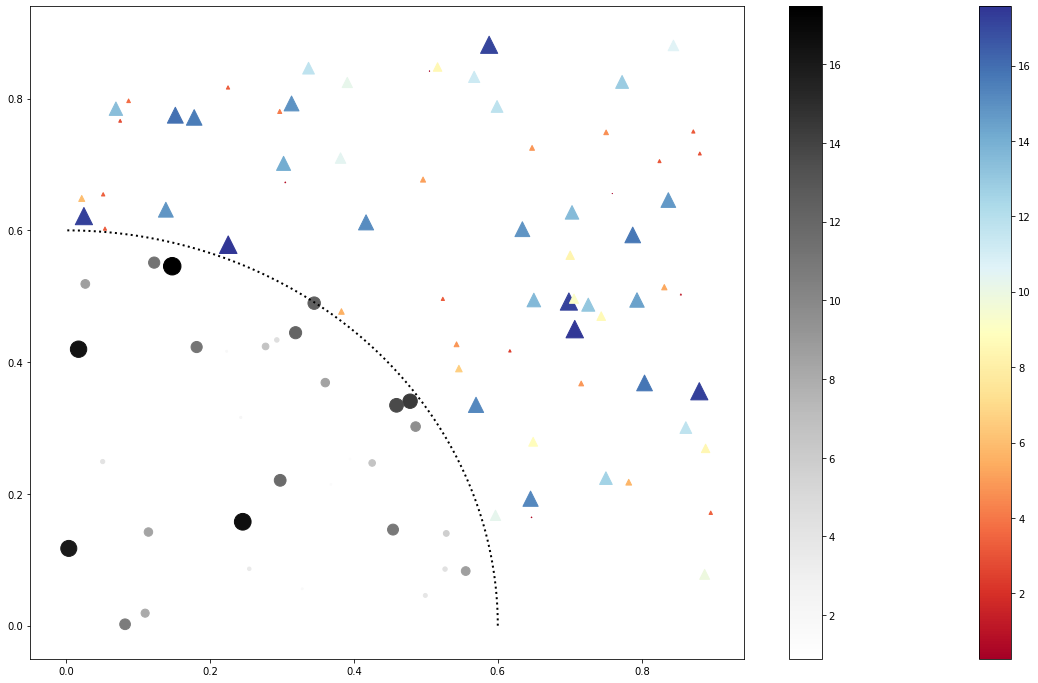

In [4]:
N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = np.pi * (10 * np.random.rand(N)) ** 2  # 0 to 10 point radiuses
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y ** 2)
cm1 = plt.cm.get_cmap('RdYlBu')
cm2 = plt.cm.get_cmap('Greys')

plt.figure(figsize=(20, 12))
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
sc1 = plt.scatter(x, y, s=area1, marker='^', c=c, cmap=cm1)
plt.colorbar(sc1)
sc2 = plt.scatter(x, y, s=area2, marker='o', c=c, cmap=cm2)
plt.colorbar(sc2)

# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta), "k:", lw=2.0)

plt.show()

### ¿Cuándo utilizar scatter plot?
* x: Dato del tipo posicional o cuantitativo.
* y: Dato del tipo posicional o cuantitativo. 
* z: Dato del tipo nominal u ordinal (opcional) 

***OBSERVACION***: Si hay pocos puntos, también puede usarse para z datos de tipo posicional o cuantitativo.


### Gráfico de Barra de Error
<a id='error-bar-plot'></a>

C:\Users\Public\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


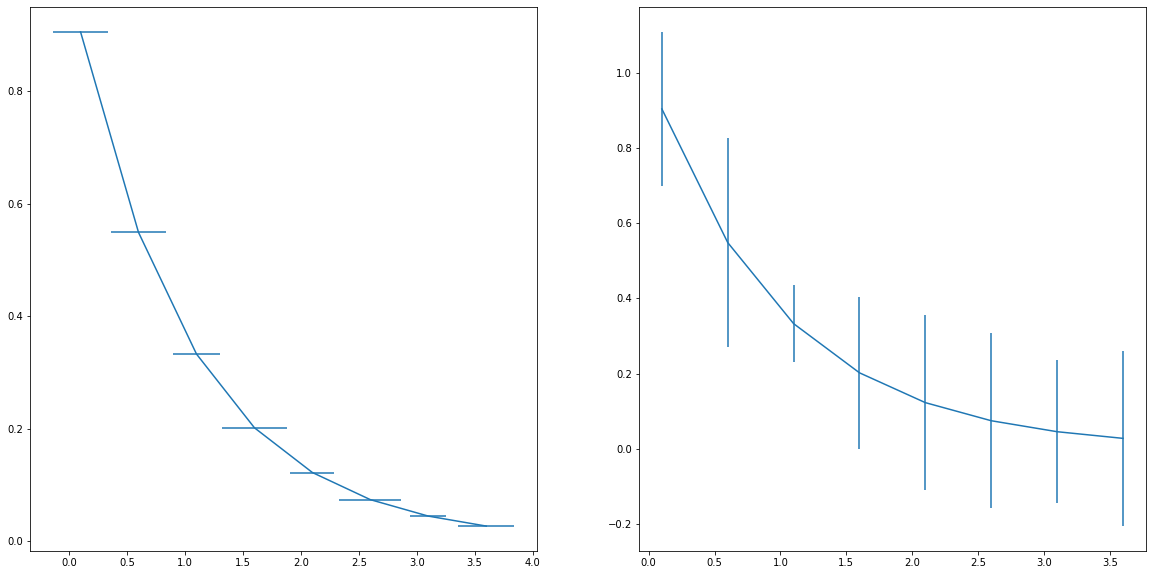

In [5]:
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

x_error = 0.1 + 0.2*np.random.rand(len(x))
ax1.errorbar(x, y, xerr=x_error)

y_error = 0.1 + 0.2*np.random.rand(len(x))
ax2.errorbar(x, y, yerr=y_error)

fig.show()

#### ¿Cuándo utilizar gráfico de barra de error?
* x: Dato del tipo posicional o cuantitativo.
* y: Dato del tipo posicional o cuantitativo. 
* z: Dato del tipo posicional o cuantitativo.
Los valores de z tienen que tener las mismas unidades y.

### Countor Plot
<a id='countour-plot'></a>

C:\Users\Public\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


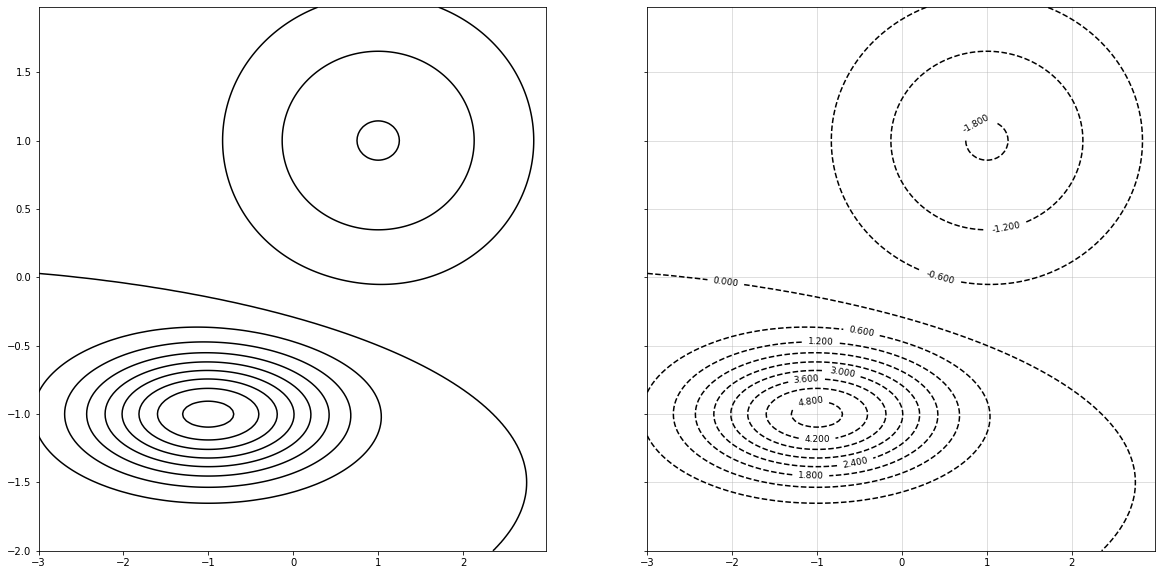

In [6]:
x, y = np.mgrid[-3:3:.025, -2:2:.025]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
z1 = multivariate_normal.pdf(
    pos,
    mean=[-1.0, -1.0],
    cov=[[1.0, 0.0], [0.0, 0.1]]
)
z2 = multivariate_normal.pdf(
    pos, 
    mean=[1.0, 1.0],
    cov=[[1.5, 0.0], [0.0, 0.5]]
)
z = 10 * (z1 - z2)

fig, axs = plt.subplots(ncols=2, figsize=(20, 10), sharex=True, sharey=True)
cmaps = [cm.rainbow, cm.autumn, cm.coolwarm, cm.gray]
countour_styles = [
    {"colors": "k", "linestyles": "solid"},
    {"colors": "k", "linestyles": "dashed"},
]

for i, ax in zip(range(len(cmaps)), axs.ravel()):
    cs = ax.contour(x, y, z, 11, **countour_styles[i])
    if i > 0:
        ax.clabel(cs, fontsize=9, inline=1)
        ax.grid(alpha=0.5)
fig.show()

#### ¿Cuándo se debe utiliar countour plot?

* x: Dato del tipo posicional o cuantitativo.
* y: Dato de tipo posicional o cuantitativo. 
* z: Dato de tipo posicional o cuantitativo.

***OBSERVACION***: Se debe tener suficiente densidad/regularidad de puntos como para poder obtener superficies de nivel.

### Campos de Vectores
<a id='vector-field'></a>

¿Porqué se llama quiver al campo de vectores en inglés? 

C:\Users\Public\Documents\Anaconda\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


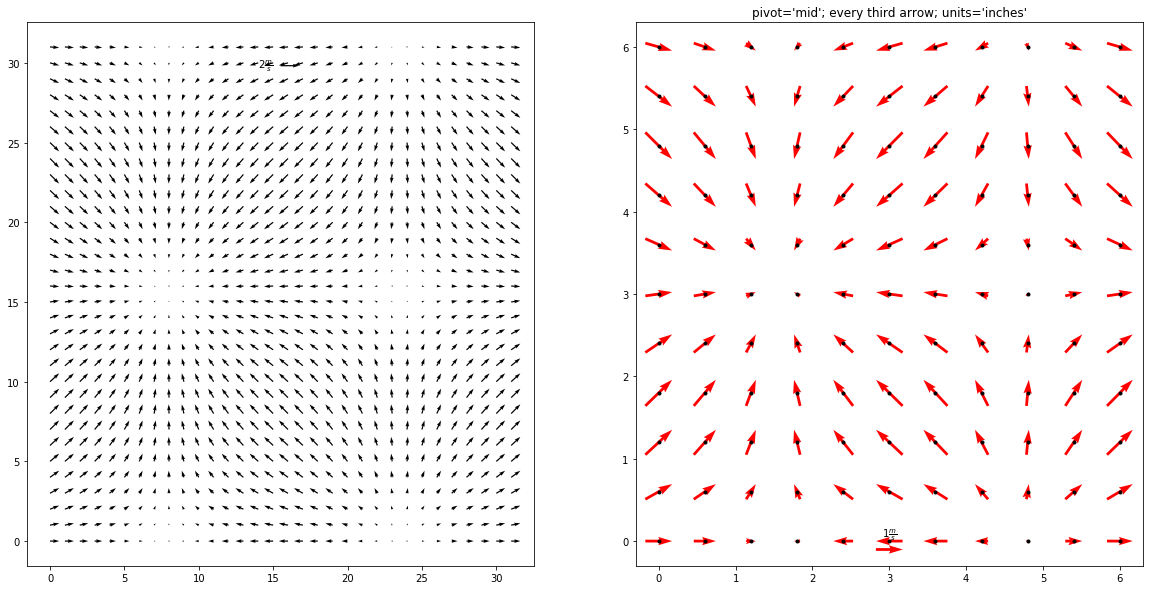

In [7]:
def my_vector_field():
    """
    You can even define a new function.
    """
    X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
    U = np.cos(X)
    V = np.sin(Y)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

    Q1 = ax1.quiver(U, V)
    qk1 = ax1.quiverkey(
        Q1,
        0.5,
        0.92,
        2,
        r'$2 \frac{m}{s}$',
        labelpos='W',
        fontproperties={'weight': 'bold'}
    )
    
    Q2 = ax2.quiver(
        X[::3, ::3],
        Y[::3, ::3],
        U[::3, ::3],
        V[::3, ::3],
        pivot='mid',
        color='r',
        units='inches'
    )
    qk2 = ax2.quiverkey(
        Q2,
        0.5,
        0.03,
        1,
        r'$1 \frac{m}{s}$',
        fontproperties={'weight': 'bold'}
    )
    ax2.plot(X[::3, ::3], Y[::3, ::3], 'k.')
    ax2.set_title("pivot='mid'; every third arrow; units='inches'")
    
    fig.show()

my_vector_field()

#### ¿Cuándo utilizar campos de vectores?

* x: Debe ser datos del tipo posicional o cuantitativo.
* y: Debe ser datos de tipo posicional o cuantitativo. 
* z: Pendiente debe ser dato de tipo posicional o cuantitativo.

Evitar: gráfico de campo de vectores si no es posible la interpretación correspondiente.

### El límite es la imaginación

Puedes encontrar una infinidad de ejemplos en la Galería de Maplotlib ([link](https://matplotlib.org/3.1.1/gallery/index.html)).

#### Mapas de Calor

In [8]:
from mpl_heatmap import heatmap, annotate_heatmap

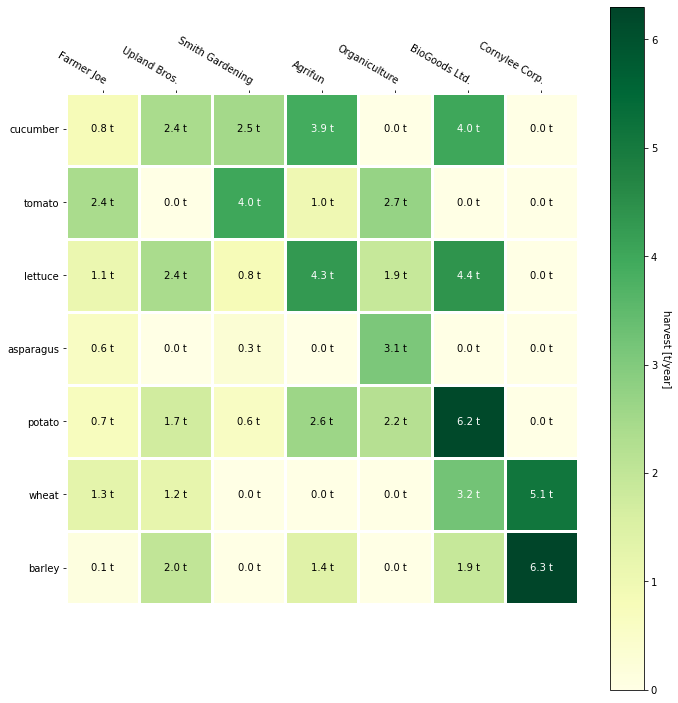

In [9]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

fig, ax = plt.subplots(figsize=(10, 10))

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

#### Conjunto de Mandelbrot

In [10]:
def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = abs(Z) < horizon
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N

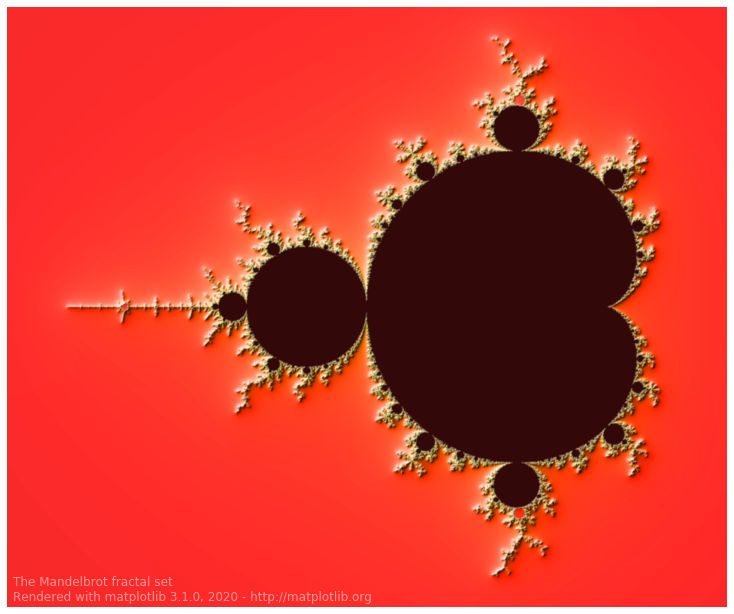

In [11]:
import time
import matplotlib
from matplotlib import colors

xmin, xmax, xn = -2.25, +0.75, 3000 // 2
ymin, ymax, yn = -1.25, +1.25, 2500 // 2
maxiter = 200
horizon = 2.0 ** 40
log_horizon = np.log2(np.log(horizon))
Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

# Normalized recount as explained in:
# https://linas.org/art-gallery/escape/smooth.html
# https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

# This line will generate warnings for null values but it is faster to
# process them afterwards using the nan_to_num
with np.errstate(invalid='ignore'):
    M = np.nan_to_num(N + 1 - np.log2(np.log(abs(Z))) + log_horizon)

dpi = 72
width = 10
height = 10*yn/xn
fig = plt.figure(figsize=(width, height), dpi=dpi)
ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)

# Shaded rendering
light = colors.LightSource(azdeg=315, altdeg=10)
M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                norm=colors.PowerNorm(0.3), blend_mode='hsv')
ax.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
ax.set_xticks([])
ax.set_yticks([])

# Some advertisement for matplotlib
year = time.strftime("%Y")
text = ("The Mandelbrot fractal set\n"
        "Rendered with matplotlib %s, %s - http://matplotlib.org"
        % (matplotlib.__version__, year))
ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

plt.show()